<a href="https://colab.research.google.com/github/be-next/TP-IA/blob/main/TP_IA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Régression linéaire

La régression linéaire est une méthode statistique permettant de trouver une ligne droite qui "s'adapte" le mieux à un ensemble de points sur un plan. L'idée est de minimiser la distance entre chaque point de données et cette ligne, de manière à ce que la ligne représente au mieux la tendance des données.

En termes simples, si l'on a un ensemble de points $(x, y)$ et que l'on veut trouver la relation linéaire $y = mx + b$ (où $m$ est la pente de la ligne et $b$ est l'ordonnée à l'origine), la régression linéaire permet de calculer les valeurs de $m$ et de $b$.

<function matplotlib.pyplot.show(close=None, block=None)>

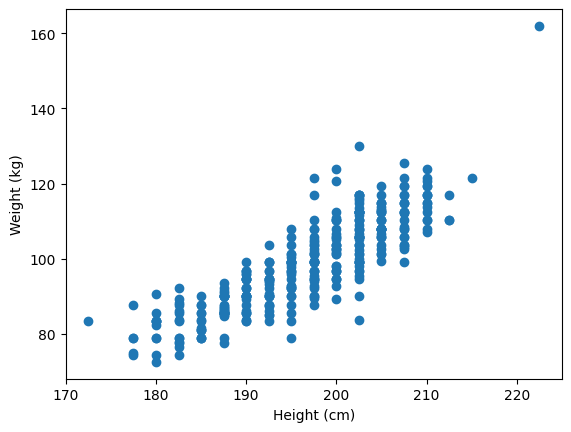

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
import numpy as np

url = "https://raw.githubusercontent.com/be-next/TP-IA/main/datasets/players_stats.csv"

df = pd.read_csv(url)

height = df.dropna()['Height']
weight = df.dropna()['Weight']

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

plt.scatter(height, weight)
plt.show




\begin{equation}
e = \sum_{i=0}^{n}
(ax_i + b - y_i)^2
\end{equation}


In [3]:
def calculer_regression_lineaire(df, nom_col_x, nom_col_y):
    x = df[nom_col_x]
    y = df[nom_col_y]

    N = len(x)
    x_sum = x.sum()
    y_sum = y.sum()
    xy_sum = (x * y).sum()
    xx_sum = (x**2).sum()

    # Calcul de la pente
    m = (N * xy_sum - x_sum * y_sum) / (N * xx_sum - x_sum**2)

    # Calcul de l'ordonnée à l'origine
    b = (y_sum - m * x_sum) / N

    return m, b

In [4]:
m, b = calculer_regression_lineaire(df, 'Height', 'Weight')

print(f"Pente (m) = {m}")
print(f"Ordonnée à l'origine (b) = {b}")

Pente (m) = 0.5133704931506958
Ordonnée à l'origine (b) = -1.6286316108489254


<function matplotlib.pyplot.show(close=None, block=None)>

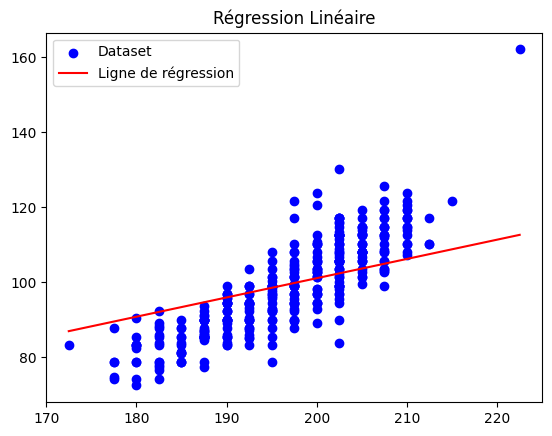

In [5]:
# Générer les valeurs x pour la ligne
x_ligne = np.linspace(min(df['Height']), max(df['Height']), 100)
# Calculer les valeurs y pour la ligne
y_ligne = m * x_ligne + b

plt.scatter(height, weight,color='blue', label='Dataset')
# Tracer la droite de régression
plt.plot(x_ligne, y_ligne, color='red', label='Ligne de régression')

plt.title('Régression Linéaire')
plt.legend()

plt.show